# Census Income

In [313]:
import numpy as np
import pandas as pd
import io
import seaborn as sns
from matplotlib import pyplot as plt
import os
from scipy import stats
from pandas import DataFrame

# Import metrics, selection, and scores
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, mean_squared_error, mean_absolute_error

### Load Data and Data Auditing

In [125]:
df = pd.read_excel('adult_train.xlsx')
df

,age,workclass,fnlwgt,education,edunum,marital,occupation,relationship,race,sex,capgain,caploss,hrperweek,native,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50k
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50k
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50k
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50k


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age             32561 non-null int64
workclass       30725 non-null object
fnlwgt          32561 non-null int64
education       32561 non-null object
edunum          32561 non-null int64
marital         32561 non-null object
occupation      30718 non-null object
relationship    32561 non-null object
race            32561 non-null object
sex             32561 non-null object
capgain         32561 non-null int64
caploss         32561 non-null int64
hrperweek       32561 non-null int64
native          31978 non-null object
income          32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [127]:
print('Percent of records that are complete: {:.2f}%'.format(100*(len(df.dropna())/len(df)))) # number of rows after dropna compare with total rows

Percent of records that are complete: 92.63%


In [128]:
df = df.dropna() # drop incomplete records
df

,age,workclass,fnlwgt,education,edunum,marital,occupation,relationship,race,sex,capgain,caploss,hrperweek,native,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50k
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50k
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50k
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50k


In [375]:
# Add 'region' for future analysis by native origin
df['region'] = np.where(df.native == 'United-States', 'North America',
               np.where(df.native == 'Canada'       , 'North America',
               np.where(df.native == 'Vietnam'      , 'Asia',
               np.where(df.native == 'China'        , 'Asia',  
               np.where(df.native == 'Taiwan'       , 'Asia',  
               np.where(df.native == 'India'        , 'Asia',  
               np.where(df.native == 'Philippines'   , 'Asia',  
               np.where(df.native == 'Japan'        , 'Asia',  
               np.where(df.native == 'Laos'         , 'Asia',  
               np.where(df.native == 'Thailand'     , 'Asia', 
               np.where(df.native == 'Hong'         , 'Asia',   
               np.where(df.native == 'Cambodia'     , 'Asia',      
               np.where(df.native == 'South'        , 'Asia',    
               np.where(df.native == 'Greece'       , 'Europe',            
               np.where(df.native == 'Poland'       , 'Europe',
               np.where(df.native == 'England'      , 'Europe', 
               np.where(df.native == 'Portugal'     , 'Europe',                                          
               np.where(df.native == 'Scotland'     , 'Europe',                         
               np.where(df.native == 'Hungary'      , 'Europe',                      
               np.where(df.native == 'Ireland'      , 'Europe',      
               np.where(df.native == 'Holand-Netherlands','Europe',                                         
               np.where(df.native == 'France'       , 'Europe',               
               np.where(df.native == 'Yugoslavia'   , 'Europe',                   
               np.where(df.native == 'Germany'      , 'Europe',                
               np.where(df.native == 'Italy'        , 'Europe',
               np.where(df.native == 'Mexico'          , 'South America',
               np.where(df.native == 'Nicaragua'       , 'South America',
               np.where(df.native == 'Honduras'        , 'South America',  
               np.where(df.native == 'Cuba'            , 'South America',  
               np.where(df.native == 'El-Salvador'     , 'South America',  
               np.where(df.native == 'Peurto-Rico'     , 'South America',  
               np.where(df.native == 'Dominican-Republic', 'South America',  
               np.where(df.native == 'Guatemala'       , 'South America',  
               np.where(df.native == 'Outlying-US(Guam-USVI-etc)', 'South America', 
               np.where(df.native == 'Haiti'           , 'South America',  
               np.where(df.native == 'Jamaica'         , 'South America',  
               np.where(df.native == 'Ecuador'         , 'South America',  
               np.where(df.native == 'Columbia'        , 'Europe',
               np.where(df.native == 'Peru'            , 'Europe',
               np.where(df.native == 'Trinadad&Tobago' , 'Europe','Middle East'))))))))))))))))))))))))))))))))))))))))

C:\Users\thezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Numerical Variables

In [376]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'edunum', 'capgain', 'caploss', 'hrperweek'], dtype='object')


In [377]:
df.describe()

,age,fnlwgt,edunum,capgain,caploss,hrperweek
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B27513E470>,
      dtype=object)

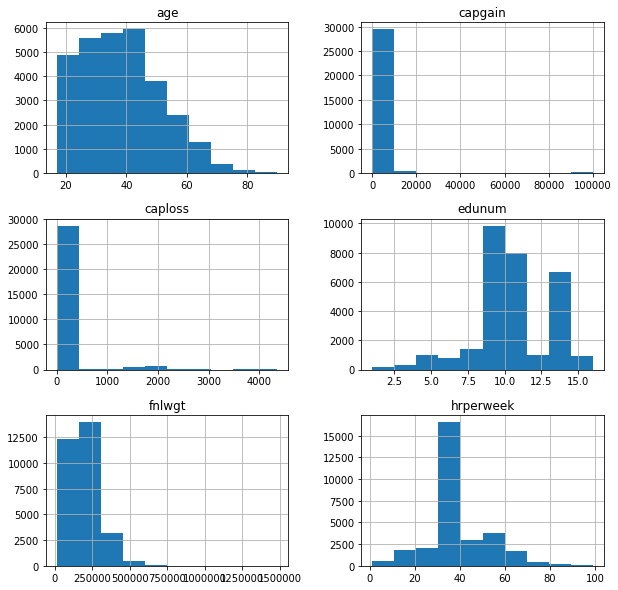

In [378]:
num_attributes.hist(figsize=(10,10))

**Findings**

capital-gain: continuous number of capital gain for an individual --> keep

capital-loss: continuous number of capital loss for an individual --> keep

edunum: the highest level of education achieved in numerical form --> mostly educated until high school level

hrperweek: the hours an individual has reported to work per week --> mostly full time employerr (close to 40 hr per week)

fnlwght represents the # of people the census believes share the same attributes --> irrelevant - to drop

### Categorical Variables

In [379]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital', 'occupation', 'relationship',
       'race', 'sex', 'native', 'income', 'region'],
      dtype='object')


In [380]:
cat_attributes

,workclass,education,marital,occupation,relationship,race,sex,native,income,region
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50k,North America
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50k,North America
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50k,North America
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50k,North America
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50k,South America
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50k,North America
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50k,North America
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50k,North America
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50k,North America


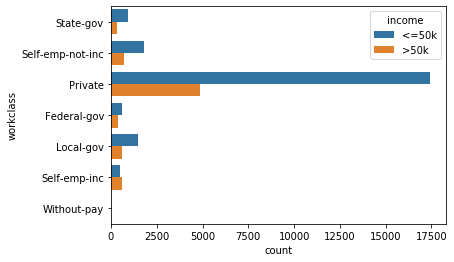

In [381]:
sns.countplot(y='workclass', hue='income', data = cat_attributes)

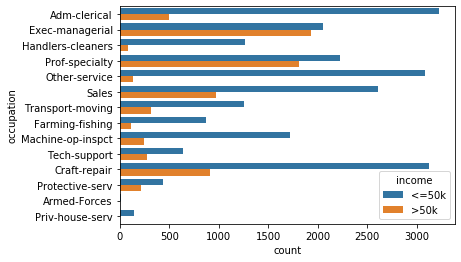

In [382]:
sns.countplot(y='occupation', hue='income', data = cat_attributes)

**Findings**

Private sector has higher income than other workclass

Exec-managerial and Prof-speciality are occupations that have higher income, while Adm-clerical, Other-service, and Craft-repair get lower income

## Challenge 1: Filipino Immogrant Outcomes

#### Age

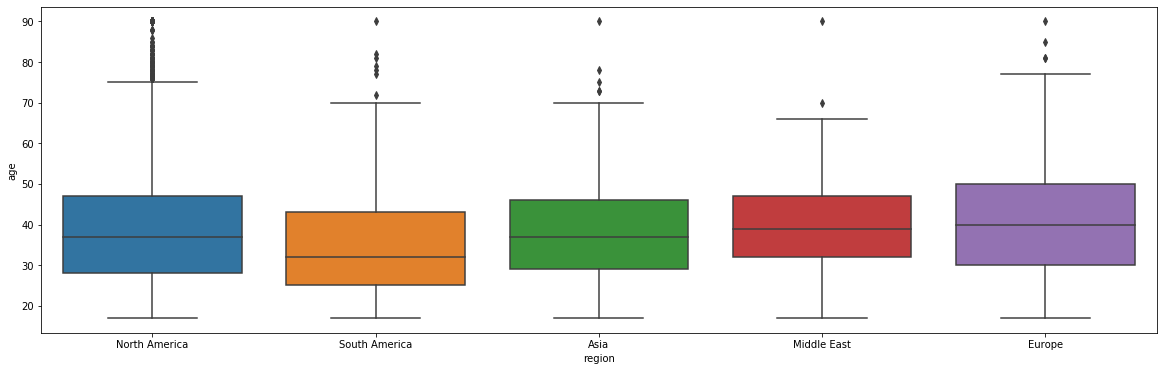

In [383]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='region', y='age', ax=ax, data=df)#, color='#99c2a2')

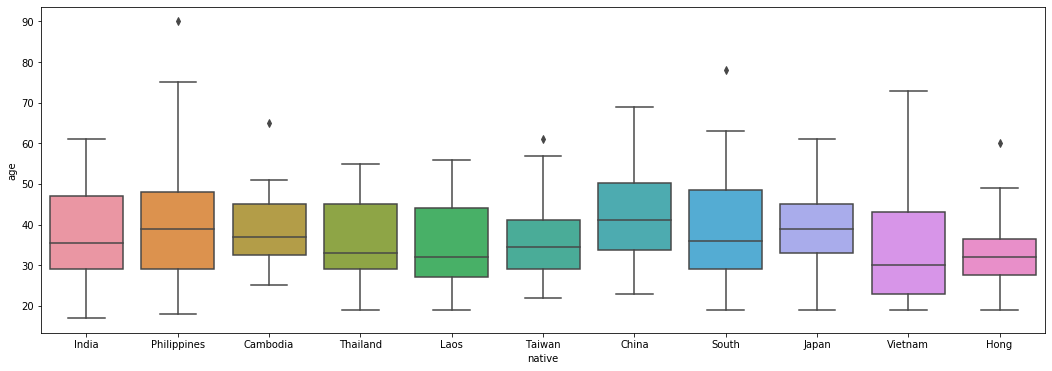

In [384]:
fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(x='native', y='age', ax=ax, data=df_asia)

In [389]:
# Compare by region
alpha = .05
f, p_val = stats.f_oneway(df[df.region=='North America'].age,
                          df[df.region=='South America'].age,
                          df[df.region=='Asia'].age,
                          df[df.region=='Middle East'].age,
                          df[df.region=='Europe'].age)
print('This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different')
print(f'The F test statistic is {round(f,3)} and the p-value is {round(p_val,4)}')
if p_val < alpha:
    print('Conclusion: Reject Ho: At least one group mean is different')
    ANOVAtype = 'ANOVA: At least one group mean different'
else:
    print('Conclusion: Fail to reject Ho: We can\'t reject that te means are the same')
    ANOVAtype = 'ANOVA: Group means are the same'

This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 25.713 and the p-value is 0.0
Conclusion: Reject Ho: At least one group mean is different


In [390]:
# Compare within South East Asia region
alpha = .05
f, p_val = stats.f_oneway(df[df.native=='Philippines'].age,
                          df[df.native=='Cambodia'].age,
                          df[df.native=='Thailand'].age,
                          df[df.native=='Laos'].age,
                          df[df.native=='Vietnam'].age)
print('This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different')
print(f'The F test statistic is {round(f,3)} and the p-value is {round(p_val,4)}')
if p_val < alpha:
    print('Conclusion: Reject Ho: At least one group mean is different')
    ANOVAtype = 'ANOVA: At least one group mean different'
else:
    print('Conclusion: Fail to reject Ho: We can\'t reject that te means are the same')
    ANOVAtype = 'ANOVA: Group means are the same'

This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 3.451 and the p-value is 0.0089
Conclusion: Reject Ho: At least one group mean is different


In [391]:
# Compare within East Asia region
alpha = .05
f, p_val = stats.f_oneway(df[df.native=='Taiwan'].age,
                          df[df.native=='China'].age,
                          df[df.native=='South'].age,
                          df[df.native=='Japan'].age,
                          df[df.native=='Hong'].age)
print('This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different')
print(f'The F test statistic is {round(f,3)} and the p-value is {round(p_val,4)}')
if p_val < alpha:
    print('Conclusion: Reject Ho: At least one group mean is different')
    ANOVAtype = 'ANOVA: At least one group mean different'
else:
    print('Conclusion: Fail to reject Ho: We can\'t reject that te means are the same')
    ANOVAtype = 'ANOVA: Group means are the same'

This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 3.79 and the p-value is 0.0052
Conclusion: Reject Ho: At least one group mean is different


**Findings**

The sampling dataset came from different age population in each region, in SEA, and in east asia region

### Income

Text(0, 0.5, 'Count')

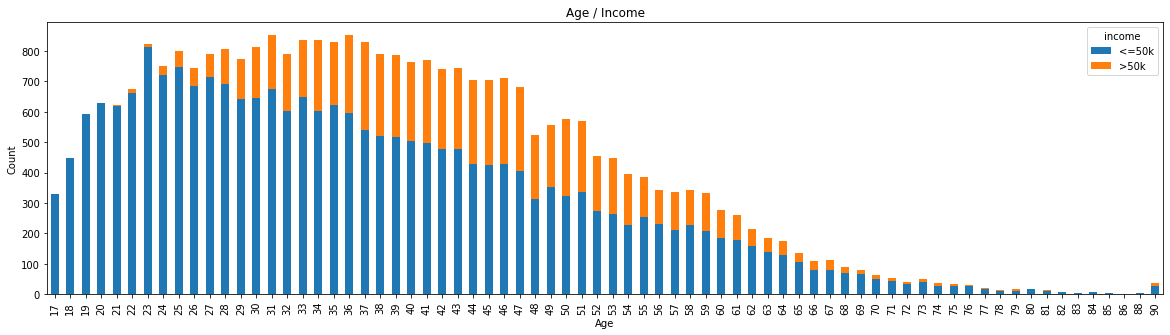

In [136]:
pd.crosstab(df.age,df.income).plot(kind='bar', figsize=(20,5), stacked=True)
plt.title('Age / Income')
plt.xlabel('Age')
plt.ylabel('Count')

**Findings**

As graduate from college and start working, there are chances to make more than 50k

C:\Users\thezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Age range / Income')

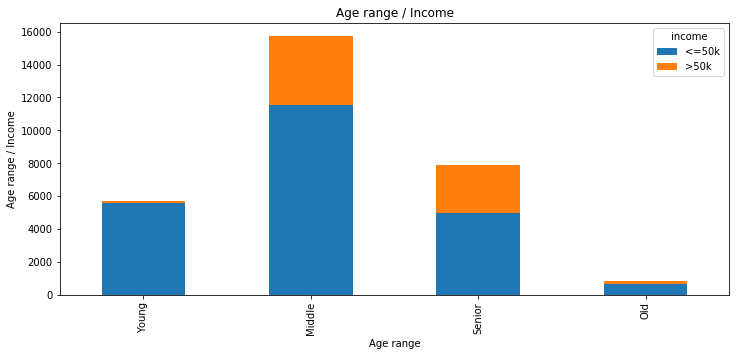

In [224]:
bins = [0, 25, 45, 65, 100]
names = ['Young', 'Middle', 'Senior', 'Old']
df['ageRange'] = pd.cut(df['age'], bins, labels=names)
pd.crosstab(df.ageRange,df.income).plot(kind='bar', figsize=(12,5), stacked=True)
plt.title('Age range / Income')
plt.xlabel('Age range')
plt.ylabel('Age range / Income')

In [164]:
df.groupby('ageRange').income.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

ageRange  income
Young     <=50k     98.0%
          >50k       2.0%
Middle    <=50k     73.1%
          >50k      26.9%
Senior    <=50k     62.5%
          >50k      37.5%
Old       <=50k     77.5%
          >50k      22.5%
Name: income, dtype: object

In [157]:
df[df.region=='Asia'].groupby('ageRange').income.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

ageRange  income
Young     <=50k     95.6%
          >50k       4.4%
Middle    <=50k     68.2%
          >50k      31.8%
Senior    <=50k     62.3%
          >50k      37.7%
Old       <=50k     75.0%
          >50k      25.0%
Name: income, dtype: object

In [189]:
df[df.region == 'Asia'].groupby(['income']).mean()

,age,fnlwgt,edunum,capgain,caploss,hrperweek
income,,,,,,
<=50k,36.02381,177772.693452,10.491071,167.949405,59.330357,39.726190
>50k,41.81295,183601.719424,13.021583,5110.640288,257.791367,45.705036


In [211]:
df[df.region=='Asia'].groupby(['native','income']).mean()

age         fnlwgt     edunum      capgain  \
native      income                                                     
Cambodia    <=50k   37.272727  158501.090909   7.727273   543.545455   
            >50k    41.428571  237677.000000  10.285714  1935.714286   
China       <=50k   41.270833  174839.145833  10.354167   119.041667   
            >50k    44.550000  188284.700000  13.350000  1088.600000   
Hong        <=50k   34.076923  189404.692308   9.538462     0.000000   
            >50k    31.500000  294478.833333  13.833333     0.000000   
India       <=50k   35.733333  171203.466667  11.483333   209.916667   
            >50k    41.625000  164542.525000  13.850000  8697.425000   
Japan       <=50k   36.000000  202506.916667  10.638889   212.666667   
            >50k    43.217391  170449.086957  12.478261  6322.739130   
Laos        <=50k   34.933333  216498.200000   8.600000   192.333333   
            >50k    41.000000  221266.500000   9.000000     0.000000   
Philippines <=50k   38.296875  158238.632812  10.257812    22.101562   
            >50k    42.866667  177872.916667  12.483333  3313.383333   
South       <=50k   37.298246  168418.175439  10.842105    79.087719   
            >50k    45.714286  159921.142857  11.928571  3219.428571   
Taiwan      <=50k   30.956522  188258.217391  12.608696    95.739130   
            >50k    41.368421  201751.578947  14.526316  5647.210526   
Thailand    <=50k   36.357143  180947.214286  10.642857     0.000000   
            >50k    32.666667  199784.000000  12.666667     0.000000   
Vietnam     <=50k   33.203390  167128.932203   9.508475   252.406780   
            >50k    35.400000  141648.400000   9.600000  5873.600000   

                       caploss  hrperweek  
native      income                         
Cambodia    <=50k   170.545455  41.545455  
            >50k      0.000000  40.000000  
China       <=50k   108.187500  38.541667  
            >50k    413.550000  38.900000  
Hong        <=50k     0.000000  39.076923  
            >50k    329.500000  45.000000  
India       <=50k    26.316667  38.233333  
            >50k    288.325000  46.475000  
Japan       <=50k    44.166667  41.333333  
            >50k     85.956522  48.086957  
Laos        <=50k     0.000000  40.400000  
            >50k      0.000000  40.000000  
Philippines <=50k    59.554688  37.968750  
            >50k    199.500000  43.083333  
South       <=50k    67.508772  42.877193  
            >50k    412.928571  50.928571  
Taiwan      <=50k     0.000000  35.608696  
            >50k    331.263158  47.157895  
Thailand    <=50k     0.000000  45.071429  
            >50k      0.000000  58.333333  
Vietnam     <=50k    99.135593  38.152542  
            >50k      0.000000  39.200000

**Findings**

Filipino immigrants who have income >50k are having average age of 42.86, which is higher than average age of other Asian immigrants who have average of 41.81

Compare to Thailand, Thai immigrants have much lesser age of people that earning >50k, this might be because sample size is too small (TH 18 vs PH 198)

In terms of hour per week, Filipinos who earn both <=50k or >50k works less than average hour of other people in Asian region

### Education

C:\Users\thezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0, 1]), <a list of 2 Text xticklabel objects>)

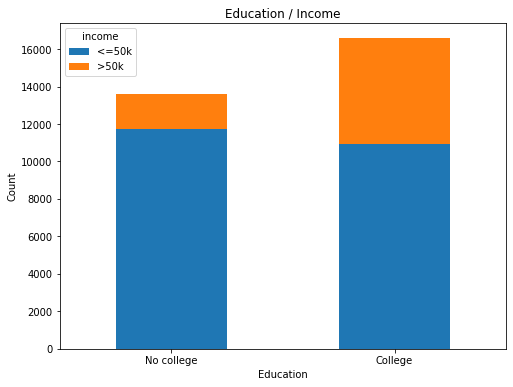

In [394]:
bins = [0,9,20]
names = ['No college','College']
df['eduRange'] = pd.cut(df['edunum'], bins, labels=names)
pd.crosstab(df.eduRange,df.income).plot(kind='bar', figsize=(8,6), stacked=True)
plt.title('Education / Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)

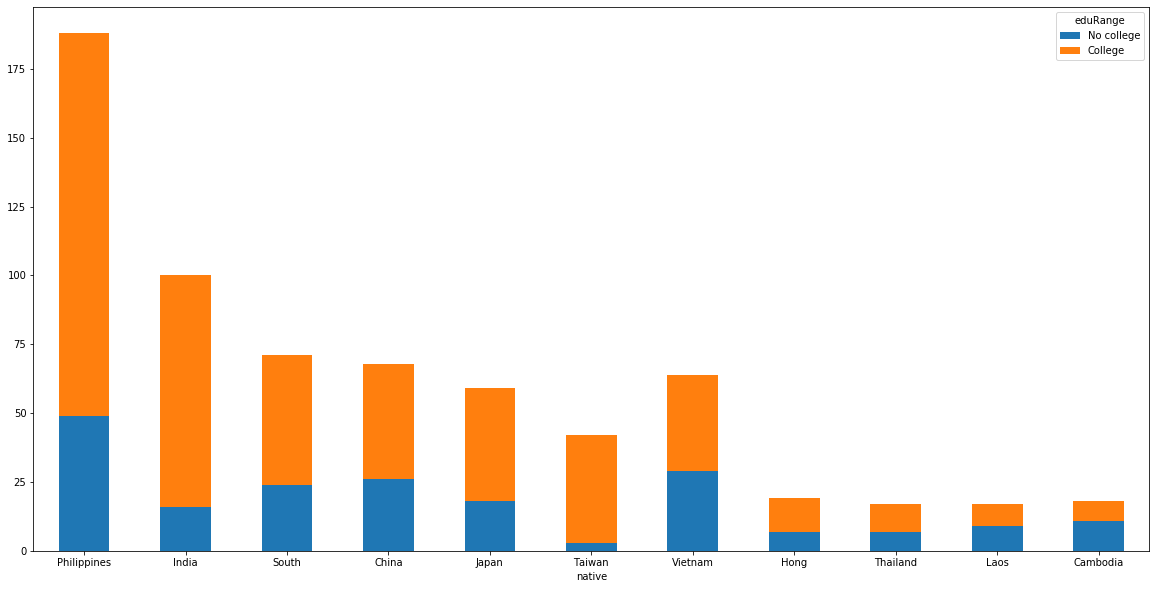

In [508]:
e = pd.crosstab(df.native,df[df.region=='Asia'].eduRange)
e.sort_values(by='College',ascending=False).plot(kind='bar',figsize=(20,10),stacked=True)
plt.xticks(rotation=0)
plt.show()

**Findings**

Education level has increase likelihood of earning more than 50k
Philippines has highest number of college graduates

### Occupation

In [440]:
df[df.region=='Asia'].occupation.value_counts()

Prof-specialty       144
Other-service         92
Adm-clerical          90
Exec-managerial       86
Sales                 71
Craft-repair          65
Machine-op-inspct     47
Tech-support          26
Handlers-cleaners     15
Protective-serv       10
Farming-fishing        9
Transport-moving       5
Priv-house-serv        3
Name: occupation, dtype: int64

In [505]:
occ = pd.crosstab(df[df.region=='Asia'].occupation,df.native)
occ['Total'] = df[df.region=='Asia'].occupation.value_counts()
occ = a.sort_values(by='Total', ascending=False)
occ

native,Cambodia,China,Hong,India,Japan,Laos,Philippines,South,Taiwan,Thailand,Vietnam,Total
occupation,,,,,,,,,,,,
Prof-specialty,3,22,5,40,8,0,28,11,21,3,3,144
Other-service,1,16,0,4,9,1,36,11,1,4,9,92
Adm-clerical,0,2,2,11,9,4,36,4,3,2,17,90
Exec-managerial,1,10,2,10,18,1,13,13,11,4,3,86
Sales,2,5,1,14,5,1,17,19,3,0,4,71
Craft-repair,6,3,4,5,7,3,14,8,2,1,12,65
Machine-op-inspct,4,8,2,2,0,7,13,2,0,1,8,47
Tech-support,0,2,1,5,0,0,14,0,1,0,3,26
Handlers-cleaners,0,0,0,3,1,0,7,2,0,0,2,15


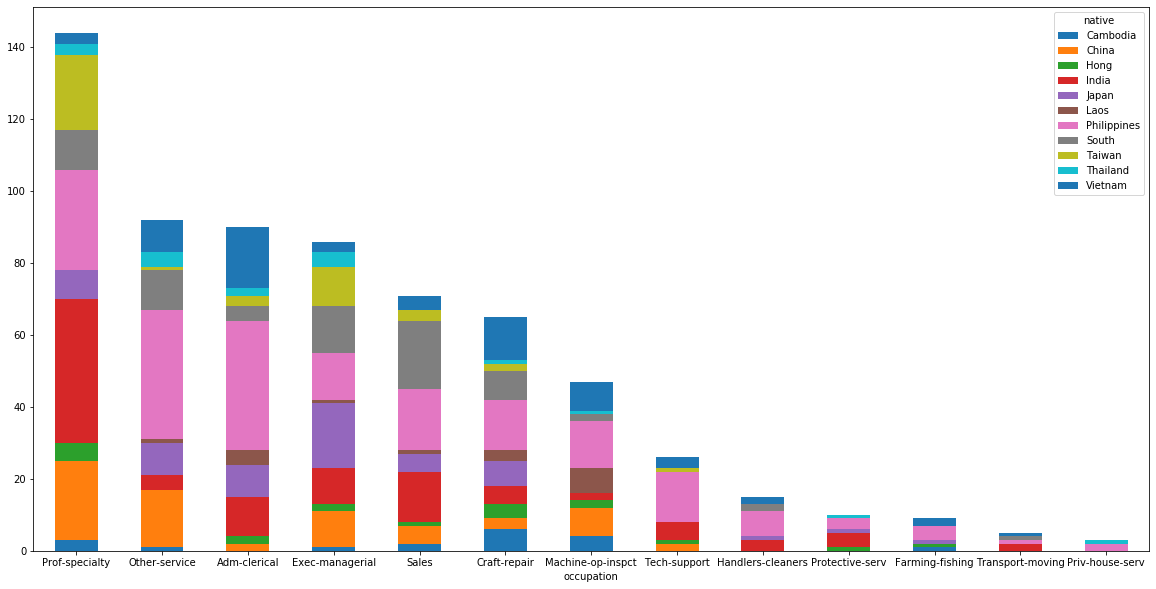

In [506]:
occ[['Cambodia','China','Hong','India','Japan','Laos','Philippines','South','Taiwan','Thailand','Vietnam']].plot(kind='bar',figsize=(20,10),stacked=True)
plt.xticks(rotation=0)
plt.show()

In [474]:
x = pd.crosstab(df.native,df[df.region=='Asia'].income)
x['Total'] = x['<=50k']+x['>50k']
x['% >50k'] = round(x['>50k']/(x['<=50k']+x['>50k']),2)
x.sort_values(by='% >50k', ascending=False)

income,<=50k,>50k,Total,% >50k
native,,,,
Taiwan,23,19,42,0.45
India,60,40,100,0.40
Cambodia,11,7,18,0.39
Japan,36,23,59,0.39
Hong,13,6,19,0.32
Philippines,128,60,188,0.32
China,48,20,68,0.29
South,57,14,71,0.20
Thailand,14,3,17,0.18


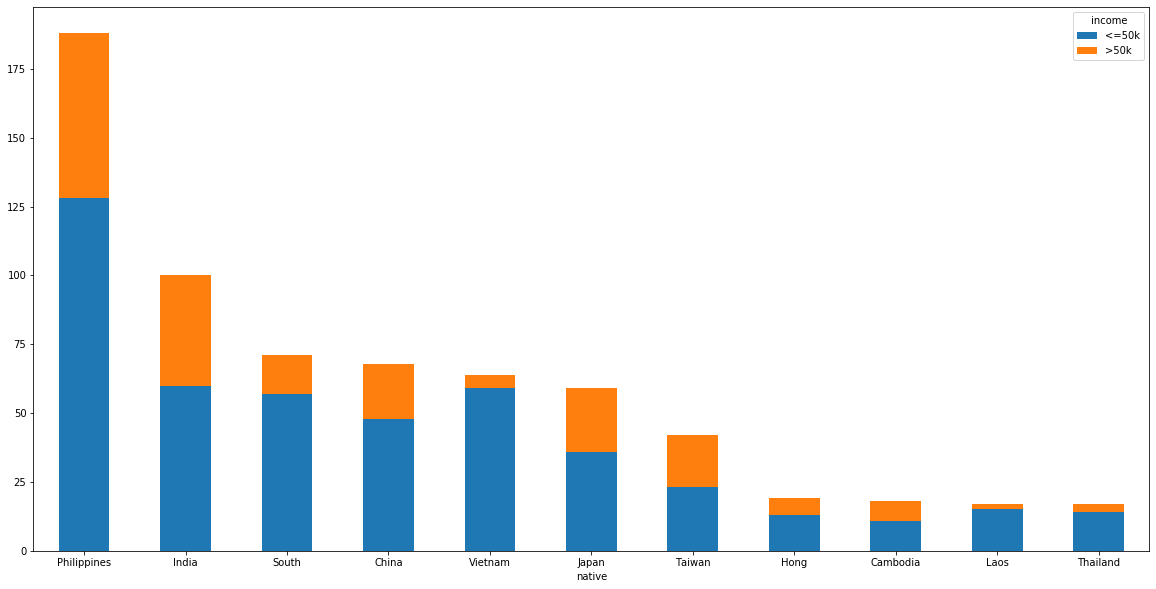

In [470]:
x = x.sort_values(by='Total', ascending=False)
x[['<=50k','>50k']].plot(kind='bar',figsize=(20,10),stacked=True)
plt.xticks(rotation=0)
plt.show()

**Findings**

As Philippines has highest number of records in this study, this graph shows that Filipinos are the majority in every occupation

In terms of ratio between peope with income >50k, Taiwan is highest, followed by India. Philippines is at rank no.6

## Challenge 2: One hard lending decision

In [294]:
cat_attributes = cat_attributes.drop()

,workclass,education,marital,occupation,relationship,race,sex,native,income,region
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50k,US
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50k,US
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50k,US
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50k,US
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50k,South America
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50k,US
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50k,US
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50k,US
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50k,US


In [303]:
df.head()

,age,workclass,fnlwgt,education,edunum,marital,occupation,relationship,race,sex,capgain,caploss,hrperweek,native,income,ageRange,region,eduRange
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k,Middle,US,College
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k,Senior,US,College
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k,Middle,US,No college
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k,Senior,US,No college
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k,Middle,South America,College


In [307]:
nominal_columns = ['workclass','marital','occupation','relationship','race','sex','income']
df_getdummy = pd.get_dummies(df[nominal_columns])
df_getdummy

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50k,income_>50k
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,1,0,1,0
32557,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [309]:
df_withdummy = pd.concat([df, df_getdummy], axis=1)
df_withdummy = df_withdummy.drop(nominal_columns,axis=1)
df_withdummy = df_withdummy.drop(['capgain','education','edunum','caploss','hrperweek','age','ageRange','native','region','eduRange','fnlwgt','income_<=50k'],axis=1)
df_withdummy # for decision tree use only

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_>50k
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
32557,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
32558,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [314]:
df_tree = df_withdummy

X1 = df_tree.drop(['income_>50k'], axis=1)
y1 = DataFrame(df_tree['income_>50k'],columns=['income_>50k'])

y1['income_>50k'] = np.where(df_tree['income_>50k'] == 1,'Yes',np.where(df_tree['income_>50k'] == 0,'No','NO VALUE'))

X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1,train_size=0.6,test_size=0.4,random_state=42)
print(len(X1_train), "Train +", len(X1_test), "Test")

18097 Train + 12065 Test


In [335]:
X1_train.to_excel('X1_train.xlsx', index = True)
y1_train.to_excel('y1_train.xlsx', index = True)

In [315]:
y1_train['income_>50k'].unique()

array(['No', 'Yes'], dtype=object)

In [316]:
X1.corr().style.background_gradient(cmap='Blues')

In [324]:
# Import Decision Trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
# Import Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import scikitplot as skplt

In [359]:
parent_size = int(len(y1_train)*.02)
clf1 = DecisionTreeClassifier(max_depth=10,min_samples_split=parent_size,min_weight_fraction_leaf =.01,min_impurity_decrease=.0001)
clf1 = clf1.fit(X1_train,y1_train)

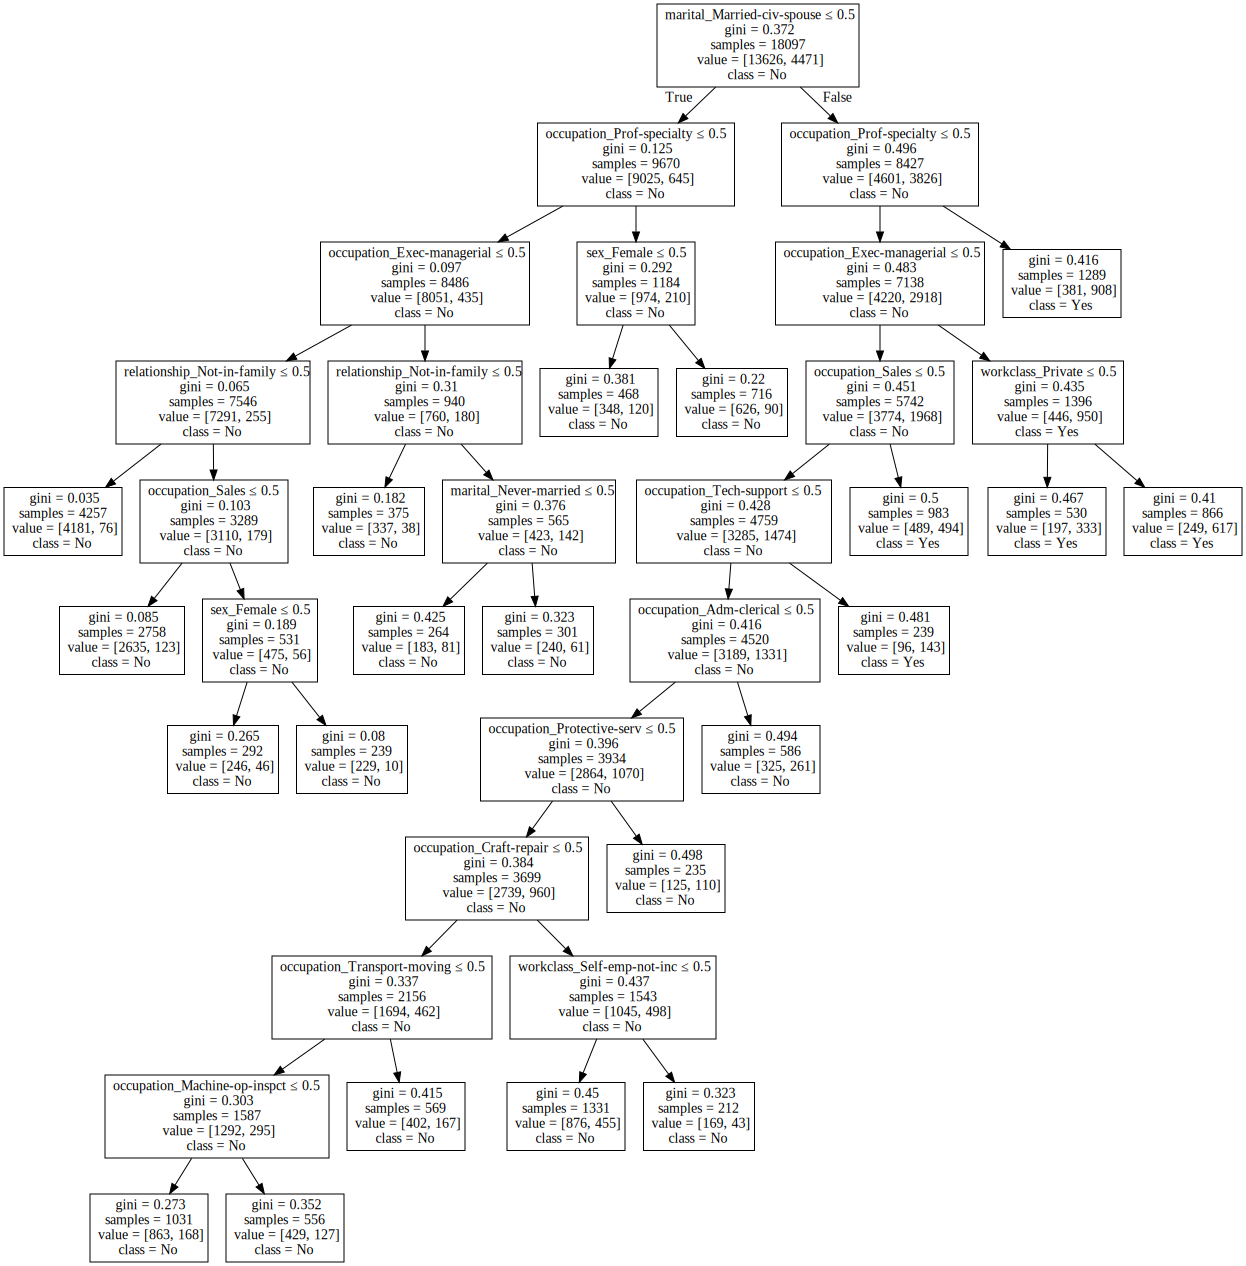

In [360]:
dt_data = export_graphviz(clf1, out_file=None, feature_names=X1_train.columns,
                          class_names=sorted(y1_train['income_>50k'].unique()),
                          special_characters=True)
graphviz.Source(dt_data)

**Transcription for last box on the right**

When marital_Married-civ-spouse is 1

Occupation is NOT Prof-specialty but is Exec-manegerial

then a chance of these people having income >50k is 950 (predict correctly)

but there are 446 cases that their income <=50k but was predicted as having >50k

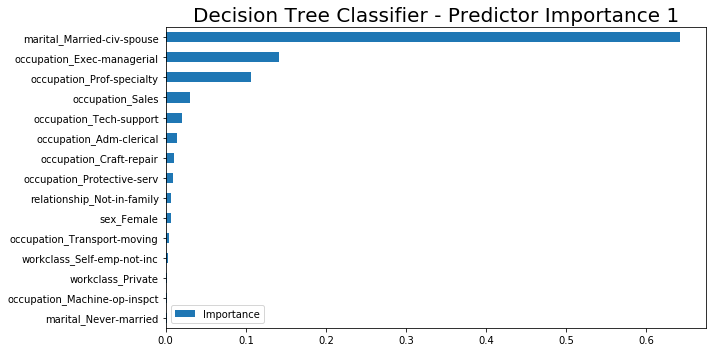

In [361]:
clf_predictors1 = pd.DataFrame(data = {'Importance':clf1.feature_importances_}, index = X1_train.columns)
clf_predictors1 = clf_predictors1[clf_predictors1.Importance > 0]
clf_predictors1 = clf_predictors1.sort_values(by = 'Importance', ascending = True)
clf_predictors1.plot(kind = 'barh', figsize = (10,5))
plt.title('Decision Tree Classifier - Predictor Importance 1', fontsize = 20)

plt.tight_layout()
plt.savefig('decision_tree_classifier_predictor_importance_1')

In [356]:
X1_test_pred_result = DataFrame(clf1.predict(X1_test),index=X1_test.index,columns=['Predicted'])
X1_test_pred_result

,Predicted
234,No
26879,No
19182,No
13485,No
9625,No
...,...
20976,No
20729,No
24948,No
1789,No


In [357]:
matrix = pd.merge(X1_test_pred_result,y1_test,left_index=True,right_index=True)
confusion = pd.crosstab(matrix['income_>50k'],matrix.Predicted)
confusion

Predicted,No,Yes
income_>50k,,
No,8120,908
Yes,1361,1676


In [358]:
Accuracy = (confusion.iloc[0,0]+confusion.iloc[1,1])/(confusion.values.sum())
print(f'Accuracy = {round(Accuracy*100,2)} %')

ErrorRate = 1 - Accuracy
print(f'Error Rate = {round(ErrorRate*100,2)} %')

FalsePos = (confusion.iloc[0,1]/(confusion.iloc[0,0]+confusion.iloc[0,1]))
print(f'False Positive = {round(FalsePos*100,2)} %')

FalseNeg = (confusion.iloc[1,0]/(confusion.iloc[1,0]+confusion.iloc[1,1]))
print(f'False Negative = {round(FalseNeg*100,2)} %')

Precision = (confusion.iloc[1,1]/(confusion.iloc[0,1]+confusion.iloc[1,1]))
print(f'Precision = {round(Precision*100,2)} %')

TruePos = (confusion.iloc[1,1])/(confusion.iloc[1,0]+confusion.iloc[1,1])
print(f'True Positive (Sensitivity) = {round(TruePos*100,2)} %')

TrueNeg = (confusion.iloc[0,0])/(confusion.iloc[0,0]+confusion.iloc[0,1])
print(f'True Negative (Specificity) = {round(TrueNeg*100,2)} %')

Accuracy = 81.19 %
Error Rate = 18.81 %
False Positive = 10.06 %
False Negative = 44.81 %
Precision = 64.86 %
True Positive (Sensitivity) = 55.19 %
True Negative (Specificity) = 89.94 %


False positive: actual is 0 but predict as 1 -- **Risk of default loan: believe that that person would make more than 50k but he is not**

False negative: actual is 1 but predict as 0 -- **Conservative -- Lower loan approve rate since believe that that person has low income but he is not**

Precision: from all 1 prediction result, how many 1 are actually correct

True positive (Sensitivity): predict 1 correctly (actual positive)
True negative (Specificity): predict 0 correctly (actual negative)

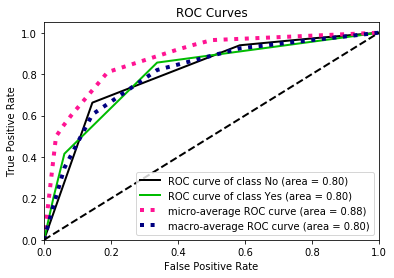

In [331]:
y1_train_proba = clf1.predict_proba(X1_train)
y1_test_proba = clf1.predict_proba(X1_test)

skplt.metrics.plot_roc(y1_train, y1_train_proba)
plt.show()

**Findings**

Using decision tree to define what are predictor importance in predicting records that have income >50k. The accuracy is 81.19%

**If that person is married with civilian, is female, work class as self-employ-not-inc, having occupation as an execitive, have income >50k, and have positive capital gain, then there is only one record. These are good indicator of telling who should be granted a loan**

#### Next step: Trying to see correlation of people who make >50k and other variables

In [512]:
columns = ['workclass','marital','occupation','sex','income']
df_getdummy2 = pd.get_dummies(df[columns])
df_getdummy2

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,...,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male,income_<=50k,income_>50k
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
32557,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
32559,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [513]:
df_withdummy2 = pd.concat([df, df_getdummy2], axis=1)
df_withdummy2 = df_withdummy2.drop(columns,axis=1)
df_withdummy2 = df_withdummy2.drop(['capgain','education','edunum','caploss','hrperweek','age','ageRange','native','region','eduRange','fnlwgt','income_<=50k'],axis=1)
df_withdummy2 # for decision tree use only

,relationship,race,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_Divorced,...,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male,income_>50k
0,Not-in-family,White,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Husband,White,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Not-in-family,White,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,Husband,Black,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Wife,Black,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Wife,White,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
32557,Husband,White,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
32558,Unmarried,White,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,Own-child,White,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [514]:
df_withdummy2.corr().style.background_gradient(cmap='Blues')

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_Divorced,marital_Married-AF-spouse,marital_Married-civ-spouse,marital_Married-spouse-absent,marital_Never-married,marital_Separated,marital_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,sex_Female,sex_Male,income_>50k
workclass_Federal-gov,1,-0.048728,-0.302194,-0.0345198,-0.0539954,-0.037804,-0.00387131,0.0188213,0.0169254,0.0085025,-0.000982805,-0.0261168,-0.0047797,0.0118344,0.115666,0.0961685,-0.0352732,0.0304656,-0.0245193,-0.0186175,-0.0366327,-0.0410217,-0.0123992,0.0228002,0.00904831,-0.0577275,0.0417051,-0.0215545,0.00129032,-0.00129032,0.0573943
workclass_Local-gov,-0.048728,1,-0.456267,-0.0521196,-0.0815247,-0.0570781,-0.00584508,0.028091,-0.00715956,0.0129225,-0.00519302,-0.0400122,-0.00328648,0.0235656,0.0103748,-0.0046861,-0.0513643,-0.0238428,-0.0285727,-0.0295202,-0.0657755,-0.013238,-0.0187209,0.160033,0.235906,-0.0967657,-0.0187745,0.00429272,0.0430689,-0.0430689,0.0286727
workclass_Private,-0.302194,-0.456267,1,-0.323228,-0.505588,-0.353979,-0.0362492,-0.00449075,-0.00147774,-0.127443,0.00796494,0.135433,0.0205111,-0.015739,0.0100162,-0.0290616,0.0373427,-0.0673996,-0.118993,0.0940032,0.131291,0.0713842,0.0410305,-0.16172,-0.151342,0.0575847,0.0216623,0.0290303,0.0668034,-0.0668034,-0.117218
workclass_Self-emp-inc,-0.0345198,-0.0521196,-0.323228,1,-0.0577536,-0.0404352,-0.00414076,-0.0268615,-0.00507196,0.108014,-0.0149125,-0.0858628,-0.0138409,-0.00158598,-0.0568504,-0.00331972,-0.0233999,0.128218,0.0158573,-0.039863,-0.0434912,-0.0506764,-0.0132622,0.00694383,-0.0221936,0.0848067,-0.0307952,-0.0241286,-0.0849676,0.0849676,0.137646
workclass_Self-emp-not-inc,-0.0539954,-0.0815247,-0.505588,-0.0577536,1,-0.0632481,-0.00647692,-0.0222517,0.00118596,0.118058,0.000376457,-0.104167,-0.017866,0.00330025,-0.0948313,-0.00519266,0.0668481,0.0185454,0.235067,-0.0563349,-0.0623121,-0.0363091,-0.0207445,0.0107519,-0.0394027,0.0293845,-0.0348106,-0.00662563,-0.107515,0.107515,0.0255747
workclass_State-gov,-0.037804,-0.0570781,-0.353979,-0.0404352,-0.0632481,1,-0.0045347,0.0143834,0.000683068,-0.00706356,0.00195864,-0.000853489,0.00112006,-0.00913668,0.0466351,-0.00363555,-0.0560414,0.00811878,-0.0248874,-0.0383893,-0.0469015,-0.00704209,-0.0145239,0.111985,0.100948,-0.0716816,0.0166484,-0.0189942,0.0243219,-0.0243219,0.00975183
workclass_Without-pay,-0.00387131,-0.00584508,-0.0362492,-0.00414076,-0.00647692,-0.0045347,1,-0.00868421,-0.000568808,0.00454057,0.011582,-0.00169403,-0.00386283,0.00580765,0.0059577,-0.000372298,-0.00393849,-0.00841643,0.0478919,0.00277951,0.000545376,-0.0024495,-0.00148732,-0.00847224,-0.00318298,-0.0079133,-0.00380513,0.00187216,0.00151118,-0.00151118,-0.0124058
marital_Divorced,0.0188213,0.028091,-0.00449075,-0.0268615,-0.0222517,0.0143834,-0.00868421,1,-0.0106372,-0.376697,-0.0449103,-0.278013,-0.072238,-0.0676636,0.085242,-0.00696228,-0.0295242,0.0119284,-0.039832,-0.0280325,0.000126209,0.0130967,0.00977469,-0.00846954,-0.00726049,-0.0209031,0.00479305,-0.0174803,0.237452,-0.237452,-0.13203
marital_Married-AF-spouse,0.0169254,-0.00715956,-0.00147774,-0.00507196,0.00118596,0.000683068,-0.000568808,-0.0106372,1,-0.0246734,-0.00294159,-0.0182096,-0.00473153,-0.00443191,0.00920856,-0.000456023,0.000717255,-0.00660003,0.002198,-0.00571362,-0.00696994,0.0071866,-0.0018218,0.000696094,0.00479652,-0.00192405,-0.00466085,-0.000534347,0.0139338,-0.0139338,0.0138738
marital_Married-civ-spouse,0.0085025,0.0129225,-0.127443,0.108014,0.118058,-0.00706356,0.00454057,-0.376697,-0.0246734,1,-0.104171,-0.644862,-0.167559,-0.156948,-0.1

**Finding**

There is no significant correlation except that a person who is married with civ spouse has high correlation with those who make >50k a year